In [1]:
!pip install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,svm,metrics,model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.metrics import accuracy_score


In [3]:
digits=datasets.load_digits()

In [4]:
target=digits.target

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [14]:
#reshaping the images
flatten_digits=digits.images.reshape((len(digits.images),-1))

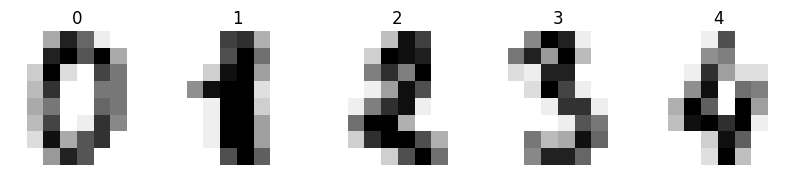

In [15]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
for ax, image, label in zip(axes, digits.images, target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(flatten_digits,target,test_size=0.2)

In [17]:
scaler=StandardScaler()
X_train_logistic=scaler.fit_transform(X_train)
X_test_logistic=scaler.transform(X_test)

Create the logistic Regression and fit the logistic regression and use the <code>l1</code> penalty. Note here that since this is a multiclass problem the logistic regression paramerer <code>multi_class</code> is set to <code>multinominal</code>

In [21]:
logit=LogisticRegression(C=0.01,penalty='l1',solver='saga',tol=0.1,multi_class='multinomial')

In [22]:
logit.fit(X_train_logistic,y_train)

LogisticRegression(C=0.01, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.1)

In [23]:
y_pred_logistic=logit.predict(X_test_logistic)

get the accuracy of the logistic regression

In [32]:
print("Accuracy: "+str(logit.score(X_test_logistic, y_test)))

Accuracy: 0.8277777777777777


Lets plot out the confusion matrix, each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class.

In [34]:
label_names=[0,1,2,3,4,5,6,7,8,9]
cmx=confusion_matrix(y_test,y_pred_logistic,labels=label_names)
cmx


array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 34,  4,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1, 39,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0, 27,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  1, 29,  1,  8,  0,  0],
       [ 0,  0,  0,  0,  2,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 22,  0,  0],
       [ 0,  9,  3,  4,  0,  1,  0,  6, 10,  2],
       [ 2,  3,  0,  0,  0,  0,  0,  2,  0, 32]])

Accuracy is fine and above 80% but we can see some heavily misclassified values, the classifier had a hard time classifying 8.

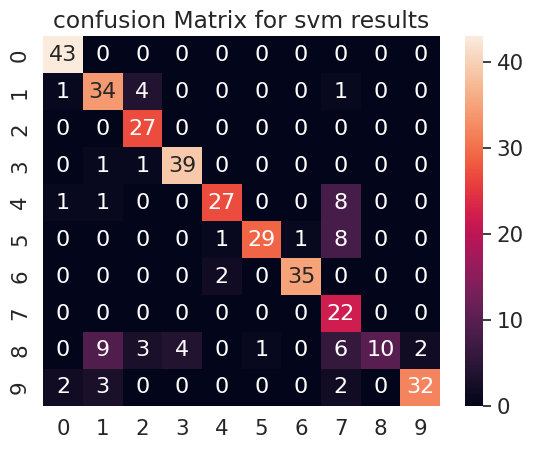

In [37]:
df_cm=pd.DataFrame(cmx)
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16})
title='confusion Matrix for svm results'
plt.title(title)
plt.show()

### Hand- written classification with SVM

In [38]:
svm_classifier=svm.SVC(gamma='scale')


In [39]:
svm_classifier.fit(X_train,y_train)

SVC()

In [40]:
y_pred_svm=svm_classifier.predict(X_test)

In [41]:
print('Accuracy:'+str(accuracy_score(y_test,y_pred_svm)))

Accuracy:0.9944444444444445


In [42]:
label_names=[0,1,2,3,4,5,6,7,8,9]
cmx=confusion_matrix(y_test,y_pred_svm,labels=label_names)

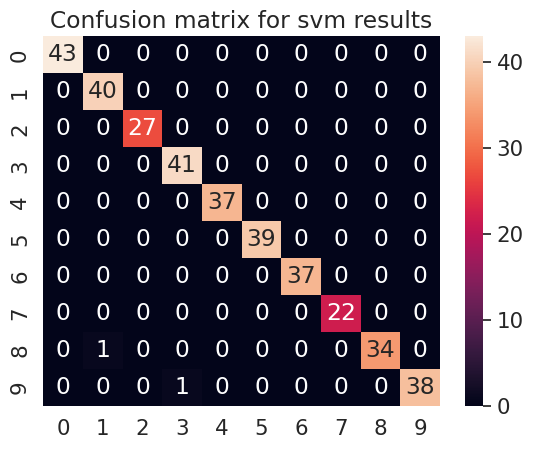

In [43]:
df_cm=pd.DataFrame(cmx)
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True)
plt.title('Confusion matrix for svm results')
plt.show()

In [48]:
algorithm = []
algorithm.append(('SVM', svm_classifier))
algorithm.append(('Logistic_L1', logit))
algorithm.append(('Logistic_L2', LogisticRegression(C=0.01, penalty='l2', solver='saga', tol=0.1, multi_class='multinomial')))


results = []
names = []
y = digits.target
for name, algo in algorithm:
    k_fold = model_selection.KFold(n_splits=10, random_state=None)
    if name == 'SVM':
        X = flatten_digits
        cv_results = model_selection.cross_val_score(algo, X, y, cv=k_fold, scoring='accuracy')
    else:
        scaler = StandardScaler()
        X = scaler.fit_transform(flatten_digits)
        cv_results = model_selection.cross_val_score(algo, X, y, cv=k_fold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)

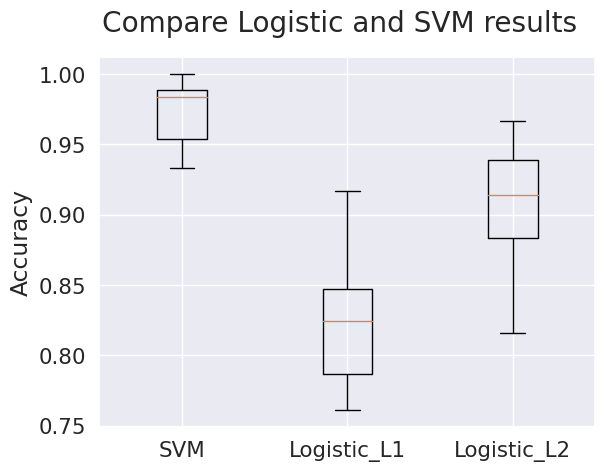

In [49]:
fig = plt.figure()
fig.suptitle('Compare Logistic and SVM results')
ax = fig.add_subplot()
plt.boxplot(results)
plt.ylabel('Accuracy')
ax.set_xticklabels(names)
plt.show()